# PRINCIPAL COMPONENT ANALYSIS

# importing required packages


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pickle

# Data prep and cleaning

In [2]:
### importing data

data_for_pca = pd.read_csv(r"C:\Users\12176\Desktop\lab\Data science\5. Machine_learning\2. Datasets/sample_data_pca.csv")
data_for_pca.head()

,user_id,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
0,1,1,0.0000,0.0891,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.0001,0.0606,0.0,0.0000,0.0578,0.1554,0.0001,0.0000,0.0000
1,2,0,0.0000,0.0000,0.0,0.0,0.0,0.0001,0.0,0.0,...,0.0008,0.0000,0.0016,0.0,0.0000,0.0000,0.0030,0.0034,0.8695,0.0037
2,3,1,0.0002,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.7179,0.0000,0.0008
3,4,1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0146,0.0275,0.0060,0.0,0.1724,0.0000,0.0021,0.0012,0.0000,0.0000
4,5,1,0.0006,0.0000,0.0,0.0,0.0,0.0002,0.0,0.0,...,0.0310,0.1061,0.0000,0.0,0.0010,0.0000,0.6773,0.0000,0.0000,0.0000


In [3]:
data_for_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Columns: 102 entries, user_id to artist100
dtypes: float64(100), int64(2)
memory usage: 283.8 KB


In [4]:
### dropping unneccessary columns

data_for_pca.drop(["user_id"], axis =1, inplace=True)

In [5]:
## Shuffle the data

data_for_pca = shuffle(data_for_pca, random_state=42)

In [6]:
### Checking class balance

data_for_pca["purchased_album"].value_counts(normalize =True)

1    0.533708
0    0.466292
Name: purchased_album, dtype: float64

In [7]:
### Dealing with missing values

data_for_pca.isna().sum()

purchased_album    0
artist1            0
artist2            0
artist3            0
artist4            0
                  ..
artist96           0
artist97           0
artist98           0
artist99           0
artist100          0
Length: 101, dtype: int64

In [8]:
data_for_pca.isna().sum().sum()

0

# Splitting the dataset into input and output variables & feature scaling

In [9]:
X = data_for_pca.drop(["purchased_album"], axis=1)
y = data_for_pca["purchased_album"]

In [10]:
## Split the data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify =y)

In [11]:
### Feature Scaling

scale_std = StandardScaler()
X_train = scale_std.fit_transform(X_train)
X_test = scale_std.transform(X_test)

# Applying PCA (using all components)

In [12]:
## instantiate & fit the model (for selecting the components)

pca = PCA(n_components = None, random_state =42)
pca.fit(X_train)

PCA(random_state=42)

In [13]:
## extract variance and cummulative variance explianed by principal components

explained_variance = pca.explained_variance_ratio_
cummulative_variance = pca.explained_variance_ratio_.cumsum()

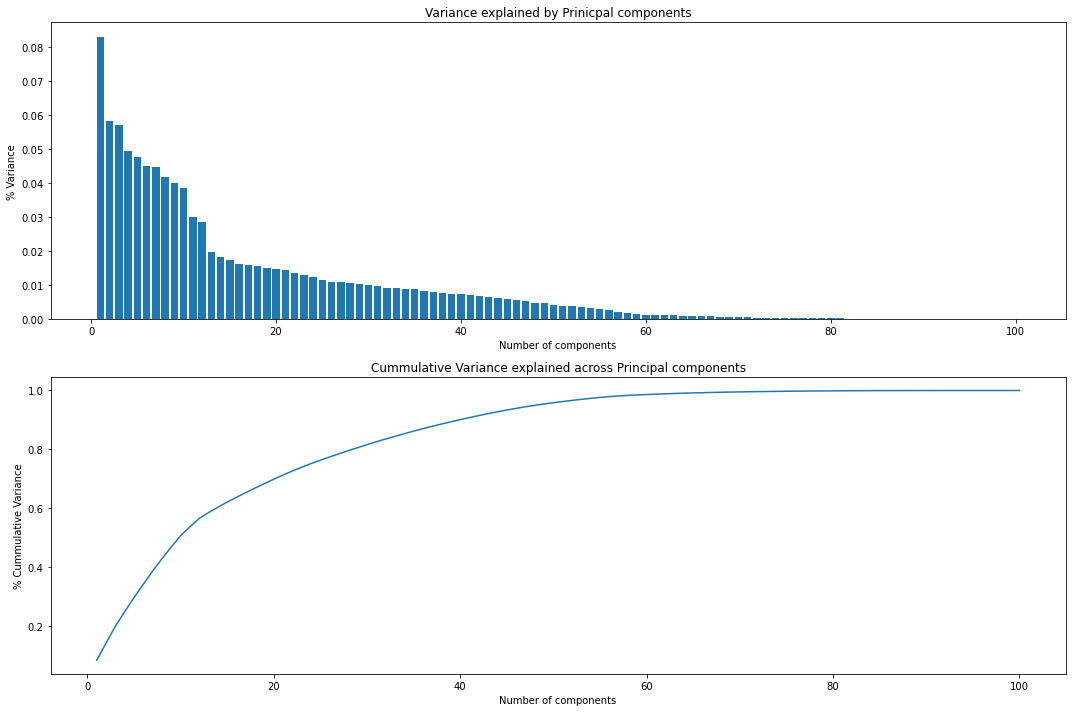

In [14]:
# Plotting the variance and cummulative variance explianed by components

num_vars = list(range(1,101))  # creating the list for number of components
plt.figure(figsize =(15,10))

### plotting the variance explained
plt.subplot(2,1,1)
plt.bar(num_vars, explained_variance )
plt.title("Variance explained by Prinicpal components")
plt.xlabel("Number of components")
plt.ylabel("% Variance")
plt.tight_layout()

### plotting the cummulative variance
plt.subplot(2,1,2)
plt.plot(num_vars,cummulative_variance )
plt.title("Cummulative Variance explained across Principal components")
plt.xlabel("Number of components")
plt.ylabel("% Cummulative Variance")
plt.tight_layout()
plt.show()

# Applying PCA with selected number of components

In [15]:
## instantiate & fit the model 

pca = PCA(n_components = 0.75, random_state =42)
X_train = pca.fit_transform(X_train)
X_test =pca.transform(X_test)

In [16]:
pca.n_components_

24

In [18]:
## Pickling the PCA model
pickle.dump(pca, open('PCA.pkl', 'wb'))

# CLASSIFICATION MODEL (RANDOM FOREST) WITH SELECTED PRINCIPAL COMPONENTS

# Grid search for selecting optimum depth and n_estimators

In [20]:
### Instantiate the Gridsearch

from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(
    estimator = RandomForestClassifier(random_state =42),
    param_grid= {"n_estimators": [10,50,100,500],
                "max_depth":[1,2,3,4,5,6,7,8,9,10,None]},
    cv = 5,
    scoring ="accuracy",
    n_jobs =-1
)

In [21]:
## fitting the grid search 

gscv.fit(X_train,y_train)  

## get the best cv score (mean)
gscv.best_score_

0.8697994987468671

In [22]:
### optimal_parameters

gscv.best_params_

{'max_depth': 9, 'n_estimators': 500}

# Model Training

In [23]:
### create optimal best model object

clf = gscv.best_estimator_
clf

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=42)

In [24]:
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Plotting the Confusion Matrix

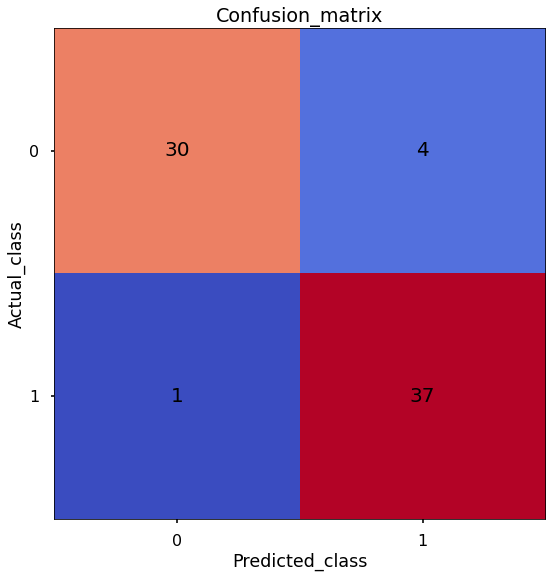

In [25]:
## confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_class)
conf_matrix

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap= "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion_matrix")
plt.ylabel("Actual_class")
plt.xlabel("Predicted_class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value, ha ="center", va ="center", fontsize =20)
plt.show()  

# Assesing the Accuracy, Precision, Recall and F1_scores

In [26]:
### Accuracy (the number of correct classification out of all attempted classification)

accuracy_score(y_test, y_pred_class)

0.9305555555555556

In [27]:
## Precision (of all observations that were predicted negative, how many were actually positive)

precision_score(y_test, y_pred_class)

0.9024390243902439

In [28]:
## Recall (of all positive obs., how many did we predict positive )

recall_score(y_test, y_pred_class)

0.9736842105263158

In [29]:
## F1_score(the harmonic mean of precision and recall)

f1_score(y_test, y_pred_class)

0.9367088607594938

In [30]:
## Pickling the model
pickle.dump(clf, open('clf.pkl', 'wb'))